# K- Nearest Neighbors(KNNs) 

## What are KNNs? 
- **KNNs are a non-parametric, lazy learning algorithm. What does this mean?** 
- *Non-parametric - no underlying assumptions about the distribution of data* 
- *Lazy-learners - No training is necessary!  This makes training super fast but testing is slower and also costly. 

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

**The algorithm can be summarized as:**
1. A positive integer k is specified, along with a new sample
2. We select the k entries in our database which are closest to the new sample
3. We find the most common classification of these entries(voting)
4. This is the classification we give to the new sample

**A few other features of KNN:**
* KNN stores the entire training dataset which it uses as its representation.
* KNN does not learn any model.
* KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.

**Note:** KNN performs better with a low number of features. The more features you have the more data you need. You increase the dimensions everytime you add another feature. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

### What are distance metrics? 
- the formulas that can be used to measure the distance between our variables 

![](https://miro.medium.com/max/1400/1*FlMiuoENrq52tMV4S6LSZg.png)

* Euclidean and Manhattan distance is best used for continuous variables 


## Applying KNN Algorithm to Diabetes Dataset 

In [1]:
#load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

#load the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(df.info())
print('-'*73)
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
-------------------------------------------------------------------------
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0

In [3]:
#replace 0 with NaNs because they will be easier to replace and detect
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



![](https://static.diffen.com/uploadz/6/61/mean-median.png)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de4feb8>,
      dtype=object)

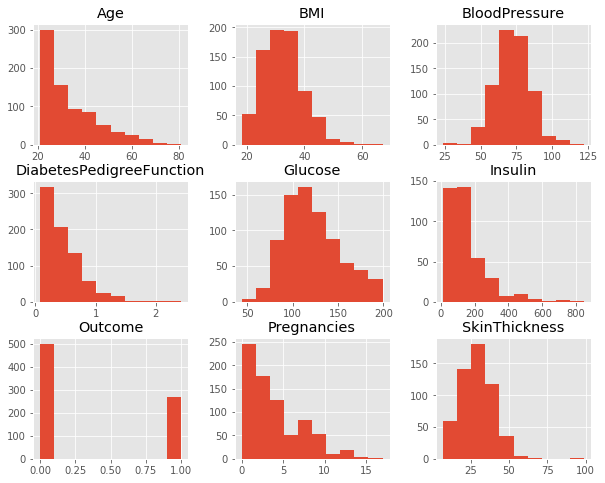

In [4]:
df.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de4ffd0>,
      dtype=object)

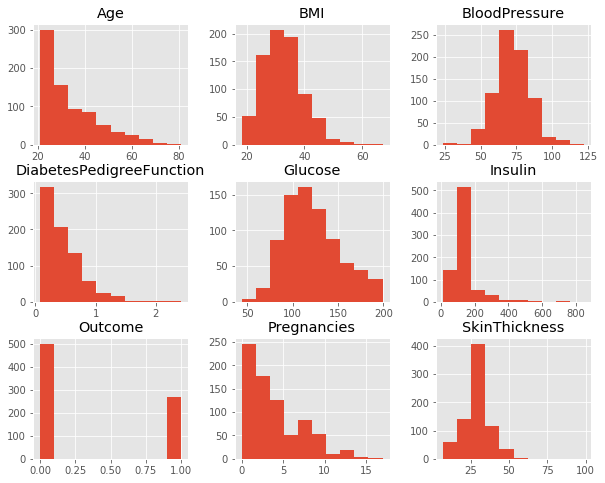

In [7]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
#df.hist(figsize=(10, 8))


In [9]:
#create numpy arrays for predictors and target variables 
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [10]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42, stratify=y)

In [12]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

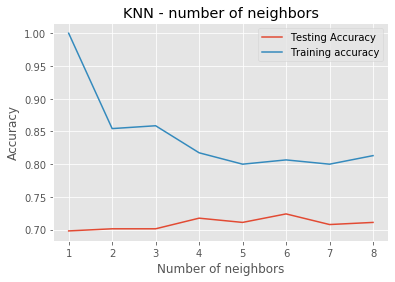

In [13]:
#Generate plot
plt.title('KNN - number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [16]:
#Setup a knn classifier with optimal k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [17]:
#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_train,y_train)

0.8065217391304348

## Evaluating the model 

In [18]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.724025974025974
----------------------------------------
Confusion Matrix:
[[167  34]
 [ 51  56]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       201
           1       0.62      0.52      0.57       107

    accuracy                           0.72       308
   macro avg       0.69      0.68      0.68       308
weighted avg       0.72      0.72      0.72       308



In [20]:
#another way to create a confusion matrix
pd.crosstab(y_test, y_pred, rownames=['True'], 
            colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,167,34,201
1,51,56,107
All,218,90,308


In [21]:
from sklearn.metrics import roc_auc_score, roc_curve 

y_pred_proba = knn.predict_proba(X_test)[:,1]

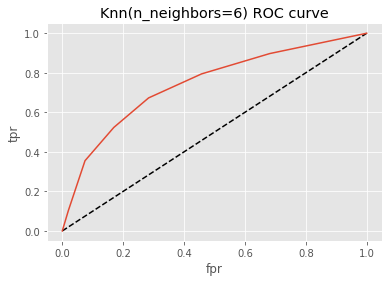

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=6) ROC curve')
plt.show()

In [24]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.7426651787790022

## Hyperparameter Tuning and Scaling 

In [25]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train)
scaled_df_train.head()

,0,1,2,3,4,5,6,7
0,0.948187,-0.796316,0.307662,0.374502,-0.579047,1.237119,1.131969,-0.112431
1,0.948187,1.965260,0.948660,-0.946963,0.717397,0.500701,0.304397,1.522594
2,0.645504,-0.566185,0.147412,-1.307362,0.255298,-0.383002,0.699308,0.662054
3,-0.565227,-0.960695,-1.615333,0.014103,-0.142620,-0.353545,-0.987778,-0.972971
4,1.856235,0.255713,0.307662,-0.106031,-0.181128,0.500701,-0.584155,0.489946


In [26]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}


In [27]:
#add cross validation hyperparameter
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(scaled_data_train, y_train)
# Predict on the test set
test_preds = knn_cv.predict(scaled_data_test)

/Users/amberyandow/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Re-evaluate after tuning 

In [28]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.7760869565217391
{'n_neighbors': 11}


## Review - Pros and Cons of KNNs 

**Pros:**
- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

**Cons:**
- Computationally expensive — because the algorithm stores all of the training data
- High memory requirement
- Stores all (or almost all) of the training data
- Prediction stage might be slow (with big N)
- Sensitive to irrelevant features and the scale of the data
